# Automating Crypto Data Collection with **Python**

In [ ]:
# Importing necessary libraries
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# Setting up API endpoint URL and parameters
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}

# Setting up headers for the API request
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '62f8a716-2b11-467a-bdde-xxxxxxxxxxxx',
}

# Creating a session object and updating its headers with our custom headers
session = Session()
session.headers.update(headers)

try:
    # Sending the GET request to the API with the specified URL and parameters
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [ ]:
# Checking the data type of the 'data' variable
type(data)

In [55]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# This allows you to see all the columns, not just like 15 as limit set above
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
# This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')  # Adding a 'timestamp' column with the current time

In [ ]:
# Defining a function to run the API and update the DataFrame
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'  # Setting up the API URL
    parameters = {  # Setting up parameters for the API call
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '62f8a716-2b11-467a-bdde-xxxxxxxxxxxx',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    # Append the newly fetched data to the existing DataFrame
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


In [ ]:
import os
from time import time
from time import sleep

# Looping through the API calls and updating the DataFrame
for i in range(333):  # Looping 333 times
    api_runner()
    print('API Runner completed')  # Printing a message indicating completion of API calls
    sleep(30)  # Pausing for 30 seconds
exit()

In [ ]:
# Showing the DataFrame
df

In [60]:
# Sample data cleaning
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # Setting float format for better display

In [ ]:
df

In [ ]:
# Now let's look at the coin trends over time group for summarizing mean of currency over the range
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

In [ ]:
# Change fommat to stack for easy to look
df4 = df3.stack()
df4

In [ ]:
df5 = df4.to_frame(name='values')
df5

In [ ]:
# Creating an index range
index = pd.Index(range(90))

# Set the DataFrame index object as the index
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

In [ ]:
# Changing the column name 'level_1' to 'percent_change'
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

In [ ]:
# Mapping the abbreviations to the corresponding time periods
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

In [83]:
# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

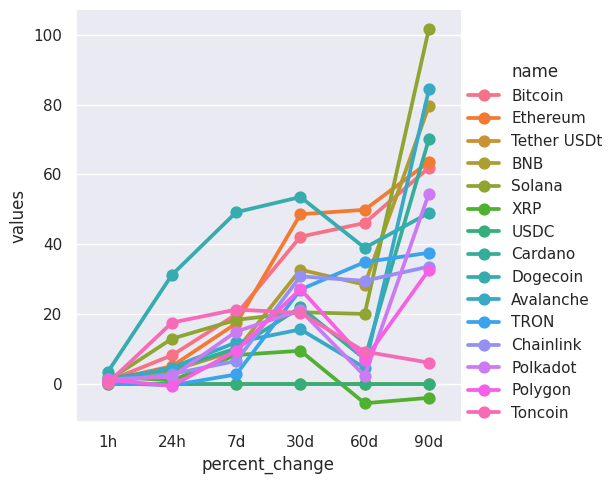

In [84]:
# Creating a categorical plot to visualize the data
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [ ]:
# Creating a simpler line plot
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

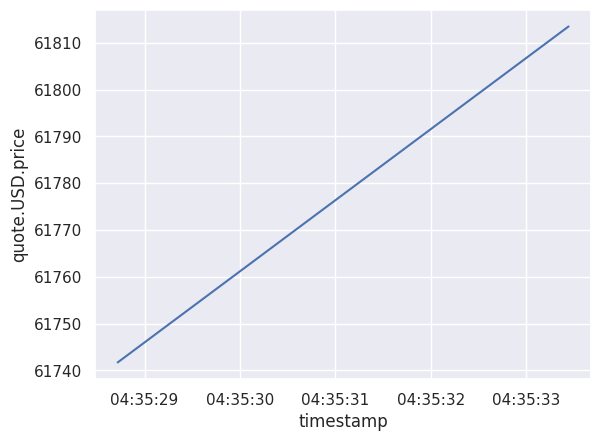

In [76]:
# Visualizing time series of 'Bitcoin' with assigned values behind
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)